In [1]:
import pandas as pd

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
#from time import time
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import confusion_matrix, roc_curve, accuracy_score, f1_score, roc_auc_score, classification_report
from astropy.table import Table
#from sklearn.metrics import roc_auc_score

ModuleNotFoundError: No module named 'astropy'

In [2]:
import pandas as pd

# Set maximum display rows and columns
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
file_path = 'MYDATA.csv'

# Load a sample of the dataset with columns up to 'X'
df = pd.read_csv(file_path, nrows=1000, usecols=range(24))
dfv = pd.read_csv(file_path,nrows=1000, usecols=range(24))
# Display the entire DataFrame
print(df)


    Sex  Age  AI1  AI2  AI3  AI4  PCGPA  Failures      Reason  \
0     F   17   82   79   85   80   7.87         0       other   
1     M   18   94   87   90   89   8.56         0  reputation   
2     F   19   75   68   71   72   6.54         1        home   
3     F   17   89   92   85   88   9.01         0  reputation   
4     M   18   78   80   77   79   7.32         0       other   
5     F   20   92   85   88   91   8.76         0        home   
6     M   17   85   88   84   86   7.76         0      course   
7     F   19   80   82   75   78   6.43         1        home   
8     M   17   95   96   98   94   9.45         0  reputation   
9     F   18   88   84   90   87   8.43         0  reputation   
10    F   20   77   74   79   76   6.87         0  reputation   
11    M   17   90   92   88   91   8.98         0  reputation   
12    M   19   72   69   75   70   7.54         0      course   
13    F   17   86   83   88   85   7.32         0      course   
14    M   18   93   98   

In [3]:
import pandas as pd

# Load your dataset
file_path = 'C:/Users/Admin/Downloads/Siva/MYDATA.csv'

# Load a sample of the dataset with columns up to 'X'
df = pd.read_csv(file_path)

# Check for missing values
print("Number of missing values in each column:")
print(df.isnull().sum())

# Threshold for the number of missing values to consider dropping a column
threshold = 3000

# Identify columns with more than the threshold number of missing values
columns_to_drop = df.columns[df.isnull().sum() > threshold]

# Drop the identified columns
df.drop(columns=columns_to_drop, inplace=True)

# Display the DataFrame after dropping columns
print("DataFrame after dropping columns:")
print(df.head())


Number of missing values in each column:
Sex                        0
Age                        0
AI1                        0
AI2                        0
AI3                        0
AI4                        0
PCGPA                      0
Failures                   0
Reason                     0
Test Preparation Course    0
Traveltime                 0
Studytime                  0
Medu                       0
Fedu                       0
Mjob                       0
Fjob                       0
Activities                 0
Internet                   0
Freetme                    0
Absence                    0
LC1                        0
LC2                        0
LC3                        1
CGPA                       2
dtype: int64
DataFrame after dropping columns:
  Sex  Age  AI1  AI2  AI3  AI4  PCGPA  Failures      Reason  \
0   F   17   82   79   85   80   7.87         0       other   
1   M   18   94   87   90   89   8.56         0  reputation   
2   F   19   75   68   71  

In [4]:
def numerical_data(df):
    df['Sex'] = df['Sex'].map({'M': 0, 'F': 1})
    df['Mjob'] = df['Mjob'].map({'teacher': 0, 'health': 1, 'services': 2, 'at_home': 3, 'other': 4})
    df['Fjob'] = df['Fjob'].map({'teacher': 0, 'health': 1, 'services': 2, 'at_home': 3, 'other': 4})
    df['Reason'] = df['Reason'].map({'home': 0, 'reputation': 1, 'course': 2, 'other': 3})
    df['Activities'] = df['Activities'].map({'no': 0, 'yes': 1})
    df['Internet'] = df['Internet'].map({'no': 0, 'yes': 1})
    df['Test Preparation Course'] = df['Test Preparation Course'].map({'none': 0, 'completed': 1})
    

# Assuming you have your DataFrame 'df' defined somewhere in your code
# If not, replace this with your method of loading the dataset into 'df'
# Example: df = pd.read_csv('your_dataset.csv')

numerical_data(df)
print(df)


      Sex  Age  AI1  AI2  AI3  AI4  PCGPA  Failures  Reason  \
0       1   17   82   79   85   80   7.87         0       3   
1       0   18   94   87   90   89   8.56         0       1   
2       1   19   75   68   71   72   6.54         1       0   
3       1   17   89   92   85   88   9.01         0       1   
4       0   18   78   80   77   79   7.32         0       3   
5       1   20   92   85   88   91   8.76         0       0   
6       0   17   85   88   84   86   7.76         0       2   
7       1   19   80   82   75   78   6.43         1       0   
8       0   17   95   96   98   94   9.45         0       1   
9       1   18   88   84   90   87   8.43         0       1   
10      1   20   77   74   79   76   6.87         0       1   
11      0   17   90   92   88   91   8.98         0       1   
12      0   19   72   69   75   70   7.54         0       2   
13      1   17   86   83   88   85   7.32         0       2   
14      0   18   93   98   95   90   9.23         0    

In [5]:
print(df.dtypes)


Sex                          int64
Age                          int64
AI1                          int64
AI2                          int64
AI3                          int64
AI4                          int64
PCGPA                      float64
Failures                     int64
Reason                       int64
Test Preparation Course      int64
Traveltime                   int64
Studytime                    int64
Medu                         int64
Fedu                         int64
Mjob                         int64
Fjob                         int64
Activities                   int64
Internet                     int64
Freetme                      int64
Absence                      int64
LC1                        float64
LC2                        float64
LC3                        float64
CGPA                       float64
dtype: object


In [6]:
df.fillna(0, inplace=True)

In [7]:
# Display unique values in the 'LC2', 'LC3', and 'CGPA' columns
print("Unique values in 'Sex':", df['Sex'].unique())
print("Unique values in 'Reason':", df['Reason'].unique())
print("Unique values in 'Test Preparation Course':", df['Test Preparation Course'].unique())


Unique values in 'Sex': [1 0]
Unique values in 'Reason': [3 1 0 2]
Unique values in 'Test Preparation Course': [1 0]


In [8]:
def feature_scaling(df):
    for i in df:
        col = df[i]
        # let's choose columns that have large values
        if(np.max(col)>6):
            Max = max(col)
            Min = min(col)
            mean = np.mean(col)
            col  = (col-mean)/(Max)
            df[i] = col
        elif(np.max(col)<6):
            col = (col-np.min(col))
            col /= np.max(col)
            df[i] = col

In [9]:
feature_scaling(df)
print(df)

      Sex       Age       AI1       AI2       AI3       AI4     PCGPA  \
0     1.0 -0.049171 -0.005502 -0.023129  0.036792 -0.013648 -0.001537   
1     0.0  0.000829  0.120813  0.058504  0.087812  0.082096  0.071479   
2     1.0  0.050829 -0.079187 -0.135374 -0.106065 -0.098755 -0.142277   
3     1.0 -0.049171  0.068182  0.109524  0.036792  0.071458  0.119098   
4     0.0  0.000829 -0.047608 -0.012925 -0.044841 -0.024287 -0.059738   
5     1.0  0.100829  0.099761  0.038095  0.067404  0.103373  0.092643   
6     0.0 -0.049171  0.026077  0.068708  0.026588  0.050182 -0.013177   
7     1.0  0.050829 -0.026555  0.007483 -0.065249 -0.034925 -0.153918   
8     0.0 -0.049171  0.131340  0.150340  0.169445  0.135288  0.165659   
9     1.0  0.000829  0.057656  0.027891  0.087812  0.060820  0.057723   
10    1.0  0.100829 -0.058134 -0.074149 -0.024433 -0.056201 -0.107357   
11    0.0 -0.049171  0.078708  0.109524  0.067404  0.103373  0.115924   
12    0.0  0.050829 -0.110765 -0.125170 -0.065249 -

In [10]:
df.shape

(3499, 24)

In [11]:
df.columns

Index(['Sex', 'Age', 'AI1', 'AI2', 'AI3', 'AI4', 'PCGPA', 'Failures', 'Reason',
       'Test Preparation Course', 'Traveltime', 'Studytime', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'Activities', 'Internet', 'Freetme', 'Absence', 'LC1',
       'LC2', 'LC3', 'CGPA'],
      dtype='object')

In [12]:
features=['Sex', 'Age', 'AI1', 'AI2', 'AI3', 'AI4', 'PCGPA', 'Failures', 'Reason',
       'Test Preparation Course', 'Traveltime', 'Studytime', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'Activities', 'Internet', 'Freetme', 'Absence', 'LC1',
       'LC2', 'LC3']

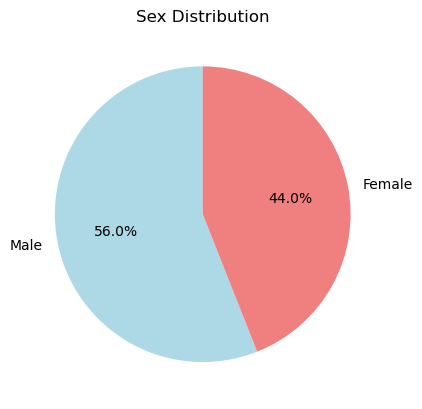

In [13]:
import matplotlib.pyplot as plt

# Assuming dfv is your DataFrame
sex_distribution = dfv['Sex'].value_counts()

# Plotting the pie chart
labels = ['Male', 'Female']
colors = ['lightblue', 'lightcoral']

plt.pie(sex_distribution, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.title('Sex Distribution')
plt.show()


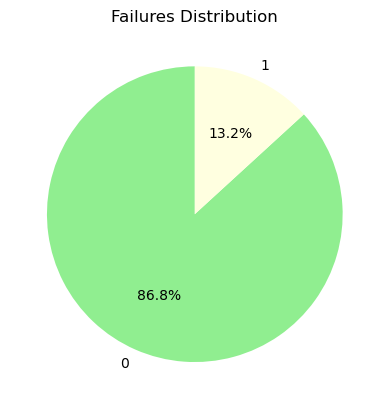

In [14]:
import matplotlib.pyplot as plt

# Assuming dfv is your DataFrame
failures_distribution = dfv['Failures'].value_counts()

# Plotting the pie chart
labels = failures_distribution.index.astype(str)
colors = ['lightgreen', 'lightyellow', 'lightcoral', 'lightblue']

plt.pie(failures_distribution, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.title('Failures Distribution')
plt.show()


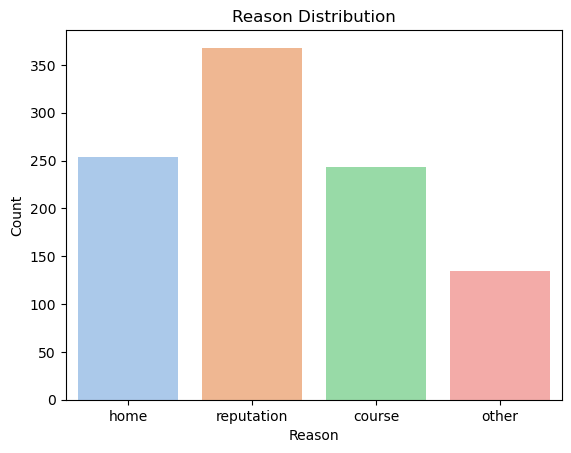

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming dfv is your DataFrame
figure, ax = plt.subplots()
reason_distribution = dfv['Reason'].value_counts()

sns.set_palette("pastel")
ax = sns.barplot(x=reason_distribution.index.astype(str), y=reason_distribution.values, order=['home', 'reputation', 'course', 'other'])
ax.set(xlabel="Reason", ylabel="Count")
ax.set_title("Reason Distribution")
plt.show()


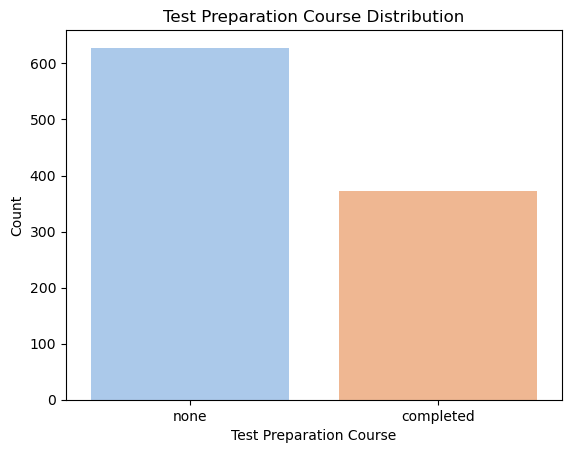

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming dfv is your DataFrame
figure, ax = plt.subplots()
test_prep_distribution = dfv['Test Preparation Course'].value_counts()

sns.set_palette("pastel")
ax = sns.barplot(x=test_prep_distribution.index.astype(str), y=test_prep_distribution.values, order=['none', 'completed'])
ax.set(xlabel="Test Preparation Course", ylabel="Count")
ax.set_title("Test Preparation Course Distribution")
plt.show()


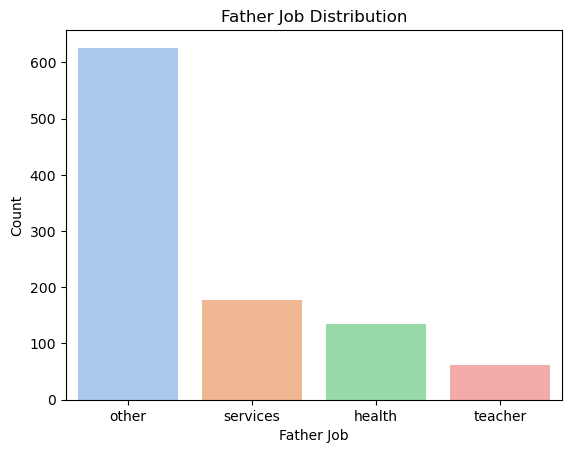

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming dfv is your DataFrame
figure, ax = plt.subplots()
fjob_distribution = dfv['Fjob'].value_counts()

sns.set_palette("pastel")
ax = sns.barplot(x=fjob_distribution.index.astype(str), y=fjob_distribution.values)
ax.set(xlabel="Father Job", ylabel="Count")
ax.set_title("Father Job Distribution")
plt.show()


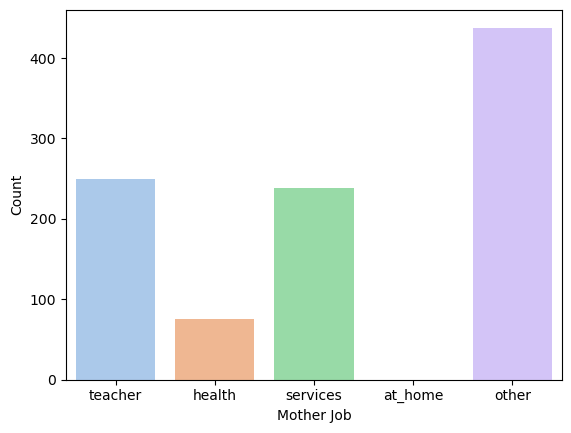

In [18]:
 #1) mother job 
# Mjob distribution
f, fx = plt.subplots()
figure = sns.countplot(x = 'Mjob', data=dfv, order=['teacher','health','services','at_home','other'])
fx = fx.set(ylabel="Count", xlabel="Mother Job")
figure.grid(False)

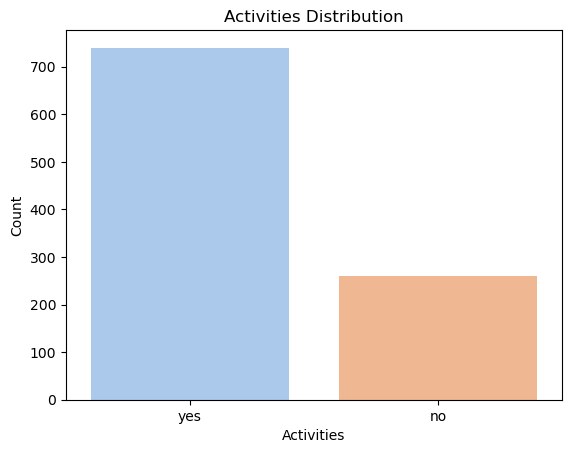

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming dfv is your DataFrame
figure, ax = plt.subplots()
activities_distribution = dfv['Activities'].value_counts()

sns.set_palette("pastel")
ax = sns.barplot(x=activities_distribution.index.astype(str), y=activities_distribution.values)
ax.set(xlabel="Activities", ylabel="Count")
ax.set_title("Activities Distribution")
plt.show()


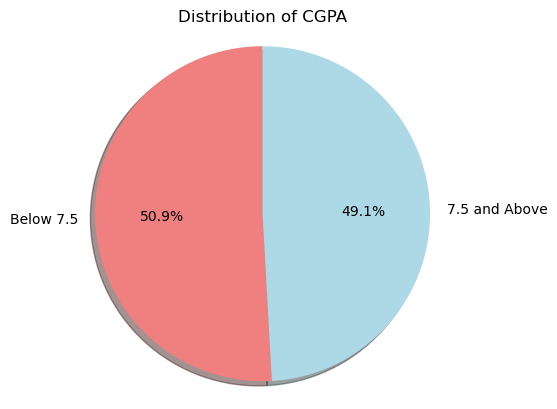

In [20]:
import pandas as pd
import matplotlib.pyplot as plt

# Replace 'your_dataset.csv' with the actual file path or URL of your dataset
df = pd.read_csv('C:/Users/Admin/Downloads/Siva/FINALINFO.csv')

# Assuming 'CGPA' is the column containing CGPA values
cgpa_column = 'CGPA'

# Filter students based on CGPA
below_7_5 = df[df[cgpa_column] < 7.5]
above_7_5 = df[df[cgpa_column] >= 7.5]

# Count the number of students in each category
num_below_7_5 = len(below_7_5)
num_above_7_5 = len(above_7_5)

# Create a pie chart
labels = ['Below 7.5', '7.5 and Above']
sizes = [num_below_7_5, num_above_7_5]
colors = ['lightcoral', 'lightblue']

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', colors=colors,
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Distribution of CGPA')
plt.show()


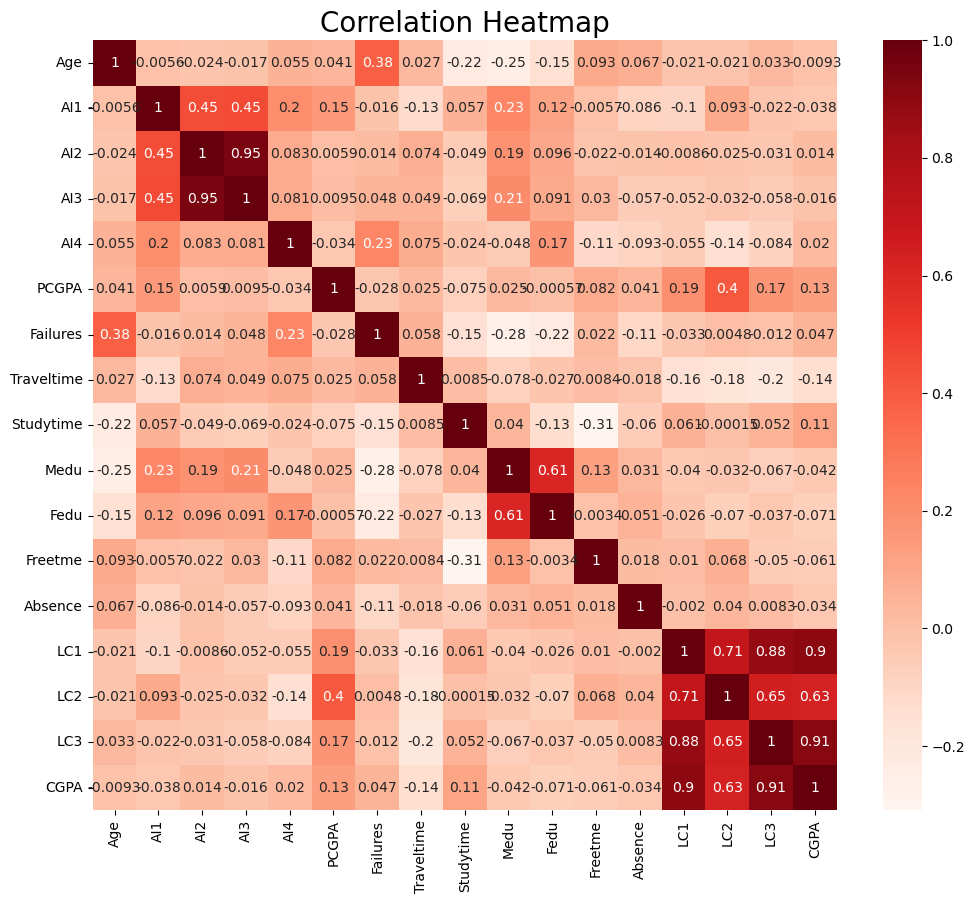

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('FINALDATASET.csv')

# Drop non-numeric columns before calculating correlation
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Handle missing values
numeric_df.dropna(inplace=True)

# Calculate correlation matrix
corr = numeric_df.corr()

# Plot the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr, annot=True, cmap="Reds")
plt.title('Correlation Heatmap', fontsize=20)
plt.show()

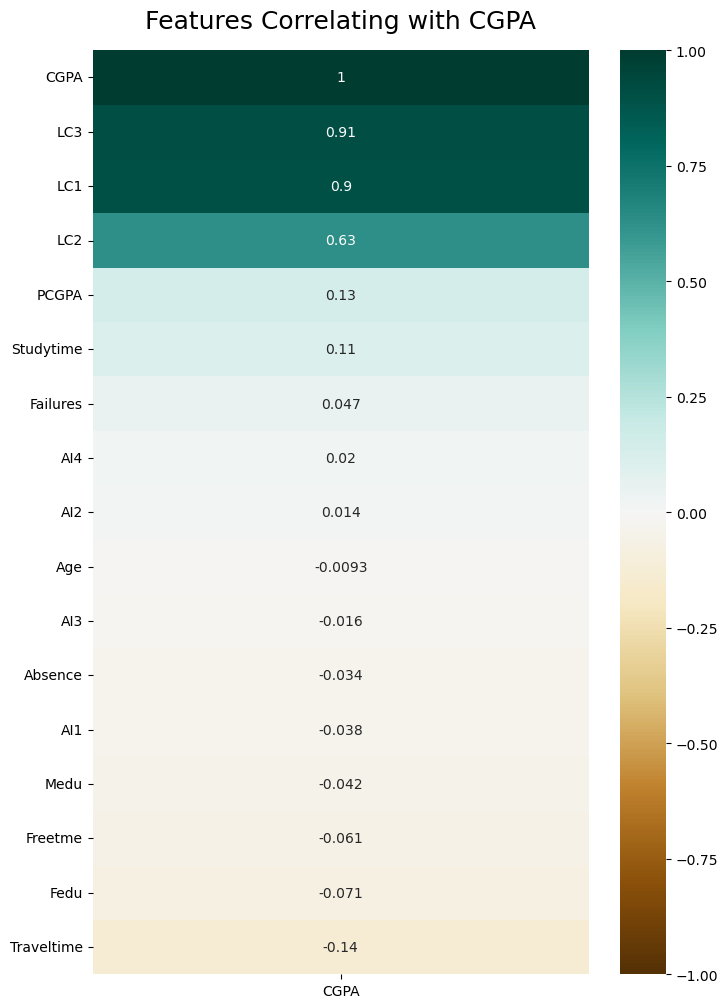

In [22]:
# Convert categorical variables to dummy variables
df_encoded = pd.get_dummies(df, columns=['Sex', 'Reason', 'Test Preparation Course', 'Mjob', 'Fjob', 'Activities', 'Internet'])

# Select only numeric columns
numeric_df = df_encoded.select_dtypes(include=['float64', 'int64'])

# Replace 'Age' with the name of the column you want to correlate with
target_column = 'CGPA'

plt.figure(figsize=(8, 12))
heatmap = sns.heatmap(numeric_df.corr()[[target_column]].sort_values(by=target_column, ascending=False), 
                      vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Features Correlating with {}'.format(target_column), fontdict={'fontsize': 18}, pad=16)
plt.show()

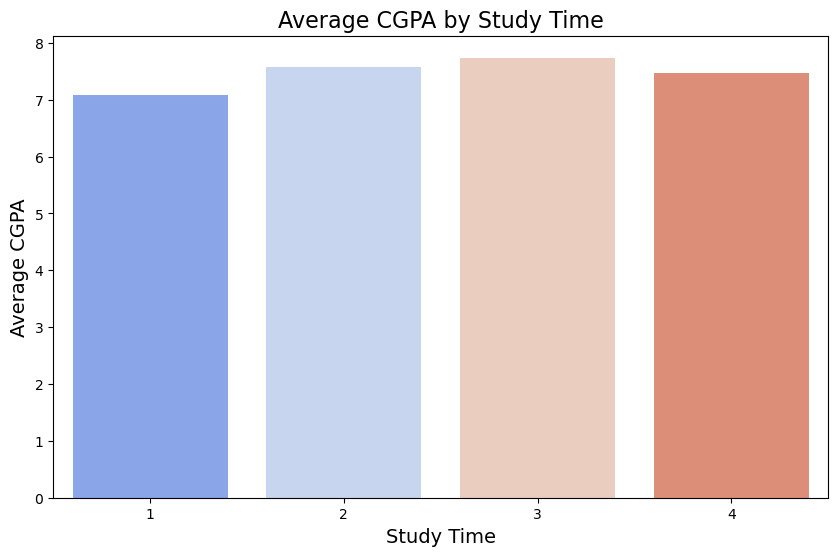

In [23]:
# Calculate the average CGPA for each study time
cgpa_by_studytime = df.groupby('Studytime')['CGPA'].mean().reset_index()

# Plot the bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x='Studytime', y='CGPA', data=cgpa_by_studytime, palette='coolwarm')
plt.title('Average CGPA by Study Time', fontsize=16)
plt.xlabel('Study Time', fontsize=14)
plt.ylabel('Average CGPA', fontsize=14)
plt.show()

In [24]:
file_path = 'C:/Users/Admin/Downloads/Siva/test data.csv'
df1 = pd.read_csv(file_path)
dfv1 = pd.read_csv(file_path)
print(df1)

   Sex  Age  AI1  AI2  AI3  AI4  PCGPA  Failures      Reason  \
0    F   15   67   63   57   67   7.32         1       other   
1    F   16   67   68   64   67   9.23         0      course   
2    F   15   67   58   60   67   5.32         0       other   
3    M   15   67   81   85   67   8.57         1       other   
4    F   15   67   53   49   67   6.54         0      course   
5    F   15   67   57   47   67   7.12         0       other   
6    F   16   67   60   62   67   9.45         0       other   
7    F   15   67   80   84   67   5.98         0  reputation   
8    M   15   67   87   83   67   8.01         0  reputation   
9    M   15   67   61   51   67   6.65         0        home   
10   F   16   67   51   48   67   7.54         0      course   
11   F   16   67   66   68   67   9.01         0       other   
12   F   16   67   63   59   67   5.21         0      course   
13   F   16   67   67   62   67   8.79         0  reputation   
14   F   16   67   82   78   67   6.32  

In [25]:
def numerical_data(df1):
    df1['Sex'] = df1['Sex'].map({'M': 0, 'F': 1})
    df1['Mjob'] = df1['Mjob'].map({'teacher': 0, 'health': 1, 'services': 2, 'at_home': 3, 'other': 4})
    df1['Fjob'] = df1['Fjob'].map({'teacher': 0, 'health': 1, 'services': 2, 'at_home': 3, 'other': 4})
    df1['Reason'] = df1['Reason'].map({'home': 0, 'reputation': 1, 'course': 2, 'other': 3})
    df1['Activities'] = df1['Activities'].map({'no': 0, 'yes': 1})
    df1['Internet'] = df1['Internet'].map({'no': 0, 'yes': 1})
    df1['Test Preparation Course'] = df1['Test Preparation Course'].map({'none': 0, 'completed': 1})
    

# Assuming you have your DataFrame 'df' defined somewhere in your code
# If not, replace this with your method of loading the dataset into 'df'
# Example: df = pd.read_csv('your_dataset.csv')

numerical_data(df1)
print(df1)


    Sex  Age  AI1  AI2  AI3  AI4  PCGPA  Failures  Reason  \
0     1   15   67   63   57   67   7.32         1       3   
1     1   16   67   68   64   67   9.23         0       2   
2     1   15   67   58   60   67   5.32         0       3   
3     0   15   67   81   85   67   8.57         1       3   
4     1   15   67   53   49   67   6.54         0       2   
5     1   15   67   57   47   67   7.12         0       3   
6     1   16   67   60   62   67   9.45         0       3   
7     1   15   67   80   84   67   5.98         0       1   
8     0   15   67   87   83   67   8.01         0       1   
9     0   15   67   61   51   67   6.65         0       0   
10    1   16   67   51   48   67   7.54         0       2   
11    1   16   67   66   68   67   9.01         0       3   
12    1   16   67   63   59   67   5.21         0       2   
13    1   16   67   67   62   67   8.79         0       1   
14    1   16   67   82   78   67   6.32         0       0   
15    1   15   67   93  

In [26]:
def feature_scaling(df1):
    for i in df1:
        col = df1[i]
        # let's choose columns that have large values
        if(np.max(col)>6):
            Max = max(col)
            Min = min(col)
            mean = np.mean(col)
            col  = (col-mean)/(Max)
            df1[i] = col
        elif(np.max(col)<6):
            col = (col-np.min(col))
            col /= np.max(col)
            df1[i] = col
feature_scaling(df1)
print(df1)

    Sex       Age  AI1     AI2     AI3  AI4     PCGPA  Failures    Reason  \
0   1.0 -0.029412  0.0 -0.0404 -0.0842  0.0 -0.010196  0.333333  1.000000   
1   1.0  0.029412  0.0  0.0096 -0.0142  0.0  0.187322  0.000000  0.666667   
2   1.0 -0.029412  0.0 -0.0904 -0.0542  0.0 -0.217022  0.000000  1.000000   
3   0.0 -0.029412  0.0  0.1396  0.1958  0.0  0.119069  0.333333  1.000000   
4   1.0 -0.029412  0.0 -0.1404 -0.1642  0.0 -0.090858  0.000000  0.666667   
5   1.0 -0.029412  0.0 -0.1004 -0.1842  0.0 -0.030879  0.000000  1.000000   
6   1.0  0.029412  0.0 -0.0704 -0.0342  0.0  0.210072  0.000000  1.000000   
7   1.0 -0.029412  0.0  0.1296  0.1858  0.0 -0.148769  0.000000  0.333333   
8   0.0 -0.029412  0.0  0.1996  0.1758  0.0  0.061158  0.000000  0.333333   
9   0.0 -0.029412  0.0 -0.0604 -0.1442  0.0 -0.079483  0.000000  0.000000   
10  1.0  0.029412  0.0 -0.1604 -0.1742  0.0  0.012554  0.000000  0.666667   
11  1.0  0.029412  0.0 -0.0104  0.0258  0.0  0.164571  0.000000  1.000000   

In [27]:
print(df1.dtypes)


Sex                        float64
Age                        float64
AI1                        float64
AI2                        float64
AI3                        float64
AI4                        float64
PCGPA                      float64
Failures                   float64
Reason                     float64
Test Preparation Course    float64
Traveltime                 float64
Studytime                  float64
Medu                       float64
Fedu                       float64
Mjob                       float64
Fjob                       float64
Activities                 float64
Internet                   float64
Freetme                    float64
Absence                    float64
LC1                        float64
LC2                        float64
LC3                        float64
dtype: object


In [28]:
X= df.drop('CGPA', axis=1)  # Features
y = df['CGPA']  # Target variable


In [29]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd


# Identify categorical columns
categorical_columns = X.select_dtypes(include=['object']).columns

# Separate numerical and categorical columns
numeric_cols = X.select_dtypes(include=['number']).columns
X_numeric = X[numeric_cols]
X_categorical = X[categorical_columns]

# Create transformers
numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(drop='first')

# Combine transformers
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_cols),
        ('cat', categorical_transformer, categorical_columns)
    ])

# Create the SVR model
model = SVR(kernel='linear')

# Create the pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                             ('model', model)])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the SVR model using the pipeline
pipeline.fit(X_train, y_train)

# Make predictions on the test set
y_pred = pipeline.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")


Mean Squared Error: 0.27693374283724836
R-squared: 0.8447510901418732


In [30]:
testing_df = pd.read_csv('C:/Users/Admin/Downloads/Siva/test data.csv')
categorical_columns = ['Sex', 'Reason', 'Test Preparation Course', 'Mjob', 'Fjob', 'Activities', 'Internet']
testing_df_encoded = pd.get_dummies(testing_df, columns=categorical_columns, drop_first=True)


In [31]:
from sklearn.impute import SimpleImputer

# Identify categorical and numeric columns
categorical_columns = testing_df.select_dtypes(include=['object']).columns
numeric_columns = testing_df.select_dtypes(include=['number']).columns

# Create transformers for numeric and categorical columns
numeric_imputer = SimpleImputer(strategy='mean')
categorical_imputer = SimpleImputer(strategy='most_frequent')

# Apply transformers to the respective columns
testing_df_imputed = testing_df.copy()
testing_df_imputed[numeric_columns] = numeric_imputer.fit_transform(testing_df[numeric_columns])
testing_df_imputed[categorical_columns] = categorical_imputer.fit_transform(testing_df[categorical_columns])


In [32]:
# Encode categorical columns in the testing dataset
testing_df_encoded = pd.get_dummies(testing_df_imputed, columns=categorical_columns, drop_first=True)

# Ensure columns consistency between training and testing datasets
columns_to_add = set(X_train.columns) - set(testing_df_encoded.columns)
for column in columns_to_add:
    testing_df_encoded[column] = 0

testing_df_encoded = testing_df_encoded[X_train.columns]


In [33]:
# ...

# Make predictions on the testing dataset
y_pred_test = pipeline.predict(testing_df_imputed)

# Print the predicted values
print("Predicted CGPA values:")
print(y_pred_test)

# ...


Predicted CGPA values:
[9.18381104 6.35840345 7.82216873 9.34860037 6.2552869  8.65984474
 6.40127033 7.797373   9.35527206 5.88005578 8.55801667 6.32849717
 7.31407133 8.71122983 5.30986402 8.79228589 6.17856936 7.30971193
 9.26250138 6.39516421 8.69143399 6.50459287 7.60185351 9.39660989
 5.21999178 8.74961581 6.18896773 7.05146085 9.01964213 6.18882785
 8.08238034 6.38637833 7.43757656 9.06089798 5.77039289 8.39999856
 6.43396241 7.41963492 9.02029932 5.85977419 8.65999217 6.48691999
 7.22037488 9.22821008 5.49111162 8.92807529 6.48533444 6.34490403
 9.02019784 5.76171821]


In [34]:
#RANDOMFOREST

In [35]:
from sklearn.ensemble import RandomForestRegressor

# Create the Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Create the pipeline
rf_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                                ('model', rf_model)])

# Train the Random Forest model using the pipeline
rf_pipeline.fit(X_train, y_train)

# Make predictions on the test set
y_pred_rf = rf_pipeline.predict(X_test)

# Evaluate the Random Forest model
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print("Random Forest Model:")
print(f"Mean Squared Error: {mse_rf}")
print(f"R-squared: {r2_rf}")

# Make predictions on the testing dataset
y_pred_test_rf = rf_pipeline.predict(testing_df_imputed)

# Print the predicted values
print("\nPredicted CGPA values using Random Forest:")
print(y_pred_test_rf)


Random Forest Model:
Mean Squared Error: 0.131755182499998
R-squared: 0.92613811433118

Predicted CGPA values using Random Forest:
[8.6293 6.6129 7.4014 9.2227 5.9812 8.4771 6.3464 7.1832 9.0923 5.8143
 8.3219 6.375  7.4775 9.101  5.4203 8.7154 6.6787 7.4031 9.1687 5.9582
 8.4978 6.5279 7.4857 9.2183 5.5834 8.6761 6.3486 7.7624 9.1335 5.5882
 8.5401 6.3729 7.7009 9.1927 5.758  8.2055 6.804  7.3641 9.1272 5.7164
 8.6529 6.343  7.3102 9.0954 5.586  8.6176 6.6126 7.3734 9.1092 5.5223]


In [36]:
from sklearn.tree import DecisionTreeRegressor

# Create the Decision Tree model
dt_model = DecisionTreeRegressor(random_state=42)

# Create the pipeline
dt_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                                ('model', dt_model)])

# Train the Decision Tree model using the pipeline
dt_pipeline.fit(X_train, y_train)

# Make predictions on the test set
y_pred_dt = dt_pipeline.predict(X_test)

# Evaluate the Decision Tree model
mse_dt = mean_squared_error(y_test, y_pred_dt)
r2_dt = r2_score(y_test, y_pred_dt)

print("Decision Tree Model:")
print(f"Mean Squared Error: {mse_dt}")
print(f"R-squared: {r2_dt}")

# Make predictions on the testing dataset
y_pred_test_dt = dt_pipeline.predict(testing_df_imputed)

# Print the predicted values
print("\nPredicted CGPA values using Decision Tree:")
print(y_pred_test_dt)


Decision Tree Model:
Mean Squared Error: 0.15927
R-squared: 0.9107133221839442

Predicted CGPA values using Decision Tree:
[8.76 6.87 7.32 9.43 5.98 8.76 6.32 7.12 9.   5.98 8.54 6.65 7.76 9.12
 5.21 8.54 6.76 7.21 9.12 5.89 8.43 6.54 7.76 9.34 5.32 8.65 6.21 7.98
 9.12 5.45 8.54 6.65 7.76 9.12 5.67 8.01 6.87 7.32 9.12 5.21 8.76 6.32
 7.12 9.   5.45 8.76 6.65 7.43 9.12 5.21]


In [37]:
from sklearn.linear_model import LinearRegression

# Create the Multiple Linear Regression model
linear_model = LinearRegression()

# Create the pipeline
linear_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                                    ('model', linear_model)])

# Train the Multiple Linear Regression model using the pipeline
linear_pipeline.fit(X_train, y_train)

# Make predictions on the test set
y_pred_linear = linear_pipeline.predict(X_test)

# Evaluate the Multiple Linear Regression model
mse_linear = mean_squared_error(y_test, y_pred_linear)
r2_linear = r2_score(y_test, y_pred_linear)

print("Multiple Linear Regression Model:")
print(f"Mean Squared Error: {mse_linear}")
print(f"R-squared: {r2_linear}")

# Make predictions on the testing dataset
y_pred_test_linear = linear_pipeline.predict(testing_df_imputed)

# Print the predicted values
print("\nPredicted CGPA values using Multiple Linear Regression:")
print(y_pred_test_linear)


Multiple Linear Regression Model:
Mean Squared Error: 0.28492104075424074
R-squared: 0.8402734151513831

Predicted CGPA values using Multiple Linear Regression:
[9.05942416 6.52791242 7.77234457 9.47103181 6.19896256 8.48654057
 6.3428879  7.78812229 9.42285567 5.80379402 8.58309725 6.22022651
 7.87823944 8.87830458 5.26259979 8.88009719 6.44181236 7.39644239
 9.50078275 6.37509415 8.68752057 6.64511317 7.36914841 9.27900501
 5.2354325  8.79403486 6.21893282 7.37673098 8.88489887 6.13461165
 7.94460548 6.51808965 7.54001958 8.99924122 5.98775394 8.37939505
 6.39196106 7.36997878 8.90800265 6.11939396 8.70300818 6.58712105
 7.16593567 9.4616738  5.58323083 8.8780709  6.22903072 6.50298316
 9.06857706 5.70443979]


In [38]:
from sklearn.neural_network import MLPRegressor
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score

# Create the Artificial Neural Network (ANN) model
ann_model = MLPRegressor(hidden_layer_sizes=(100, 50), activation='relu', solver='adam', random_state=42, max_iter=500)

# Create the pipeline
ann_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                                ('model', ann_model)])

# Train the ANN model using the pipeline
ann_pipeline.fit(X_train, y_train)

# Make predictions on the test set
y_pred_ann = ann_pipeline.predict(X_test)

# Evaluate the ANN model
mse_ann = mean_squared_error(y_test, y_pred_ann)
r2_ann = r2_score(y_test, y_pred_ann)

print("Artificial Neural Network (ANN) Model:")
print(f"Mean Squared Error: {mse_ann}")
print(f"R-squared: {r2_ann}")

# Make predictions on the testing dataset
y_pred_test_ann = ann_pipeline.predict(testing_df_imputed)

# Print the predicted values
print("\nPredicted CGPA values using Artificial Neural Network (ANN):")
print(y_pred_test_ann)


Artificial Neural Network (ANN) Model:
Mean Squared Error: 1.1527435642452202
R-squared: 0.35377256717966443

Predicted CGPA values using Artificial Neural Network (ANN):
[8.28109155 6.85844087 7.34836458 9.42762096 7.20956788 8.61693215
 6.32863675 6.90404151 9.02544044 5.69966984 8.35912696 6.59700182
 9.37243963 9.14111832 5.21001949 8.71296059 6.64094422 7.18974453
 9.80922874 5.92497479 8.44163355 6.49748396 7.42421596 9.30229443
 5.45654019 8.67782414 6.20502137 7.96839324 9.19690503 5.48784268
 7.53243745 6.8740999  7.67078744 7.68047437 5.80704114 8.26538308
 6.88874745 6.62061991 9.10304275 4.89192038 8.77671204 6.4180106
 7.05739362 8.98882532 5.65793283 8.80642108 6.65662477 7.44768234
 9.16035402 5.28748391]


In [39]:
import pandas as pd

# Actual CGPA values
actual_cgpa = [8.01, 6.87, 7.32, 9.43, 5.11, 8.76, 6.32, 7.12, 9, 5.98, 8.23, 6.65, 7.43, 9.12, 5.21,
               8.54, 6.76, 7.21, 9.43, 5.89, 8.43, 6.54, 7.65, 9.34, 5.32, 8.65, 6.21, 7.98, 9.12, 5.45]

# Predicted CGPA values for each model
predicted_cgpa_svr = [9.18381104, 6.35840345, 7.82216873, 9.34860037, 6.2552869, 8.65984474, 6.40127033,
                       7.797373, 9.35527206, 5.88005578, 8.55801667, 6.32849717, 7.31407133, 8.71122983,
                       5.30986402, 8.79228589, 6.17856936, 7.30971193, 9.26250138, 6.39516421, 8.69143399,
                       6.50459287, 7.60185351, 9.39660989, 5.21999178, 8.74961581, 6.18896773, 7.05146085,
                       9.01964213, 6.18882785]

predicted_cgpa_rf = [8.6293, 6.6129, 7.4014, 9.2227, 5.9812, 8.4771, 6.3464, 7.1832, 9.0923, 5.8143,
                      8.3219, 6.375, 7.4775, 9.101, 5.4203, 8.7154, 6.6787, 7.4031, 9.1687, 5.9582,
                      8.4978, 6.5279, 7.4857, 9.2183, 5.5834, 8.6761, 6.3486, 7.7624, 9.1335, 5.5882]

predicted_cgpa_dt = [8.76, 6.87, 7.32, 9.43, 5.98, 8.76, 6.32, 7.12, 9, 5.98, 8.54, 6.65, 7.76, 9.12, 5.21,
                      8.54, 6.76, 7.21, 9.12, 5.89, 8.43, 6.54, 7.76, 9.34, 5.32, 8.65, 6.21, 7.98, 9.12, 5.45]

predicted_cgpa_lr = [9.05942416, 6.52791242, 7.77234457, 9.47103181, 6.19896256, 8.48654057, 6.3428879,
                      7.78812229, 9.42285567, 5.80379402, 8.58309725, 6.22022651, 7.87823944, 8.87830458,
                      5.26259979, 8.88009719, 6.44181236, 7.39644239, 9.50078275, 6.37509415, 8.68752057,
                      6.64511317, 7.36914841, 9.27900501, 5.2354325, 8.79403486, 6.21893282, 7.37673098,
                      8.88489887, 6.13461165]

predicted_cgpa_ann = [8.28109155, 6.85844087, 7.34836458, 9.42762096, 7.20956788, 8.61693215, 6.32863675,
                       6.90404151, 9.02544044, 5.69966984, 8.35912696, 6.59700182, 9.37243963, 9.14111832,
                       5.21001949, 8.71296059, 6.64094422, 7.18974453, 9.80922874, 5.92497479, 8.44163355,
                       6.49748396, 7.42421596, 9.30229443, 5.45654019, 8.67782414, 6.20502137, 7.96839324,
                       9.19690503, 5.48784268]

# Create a DataFrame to compare actual and predicted values
comparison_df = pd.DataFrame({
    'Actual CGPA': actual_cgpa,
    'SVR Predicted CGPA': predicted_cgpa_svr,
    'Random Forest Predicted CGPA': predicted_cgpa_rf,
    'Decision Tree Predicted CGPA': predicted_cgpa_dt,
    'Linear Regression Predicted CGPA': predicted_cgpa_lr,
    'Artificial Neural Network Predicted CGPA': predicted_cgpa_ann
})

# Print the comparison DataFrame
print(comparison_df)


    Actual CGPA  SVR Predicted CGPA  Random Forest Predicted CGPA  \
0          8.01            9.183811                        8.6293   
1          6.87            6.358403                        6.6129   
2          7.32            7.822169                        7.4014   
3          9.43            9.348600                        9.2227   
4          5.11            6.255287                        5.9812   
5          8.76            8.659845                        8.4771   
6          6.32            6.401270                        6.3464   
7          7.12            7.797373                        7.1832   
8          9.00            9.355272                        9.0923   
9          5.98            5.880056                        5.8143   
10         8.23            8.558017                        8.3219   
11         6.65            6.328497                        6.3750   
12         7.43            7.314071                        7.4775   
13         9.12            8.71123

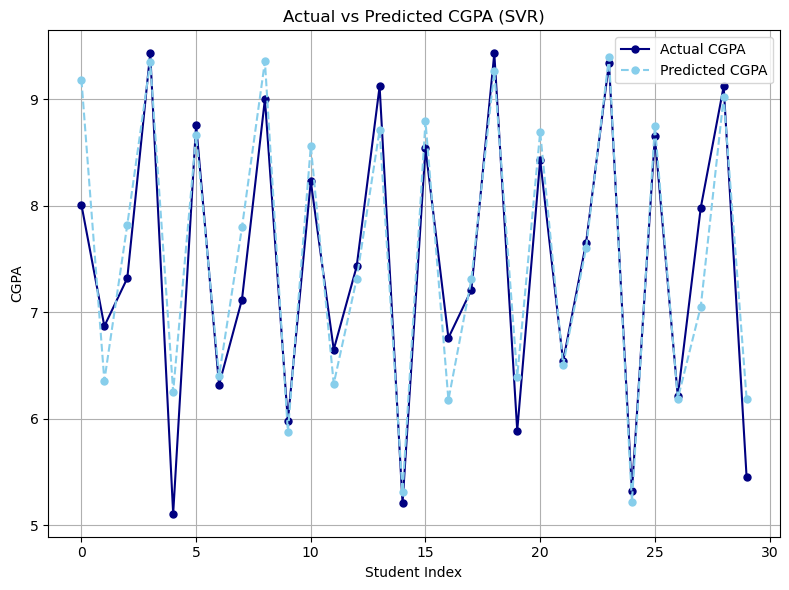

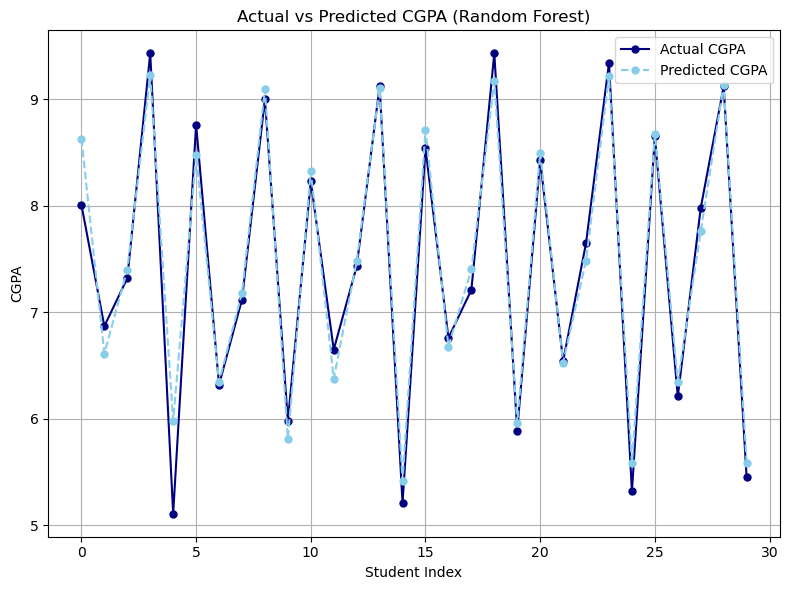

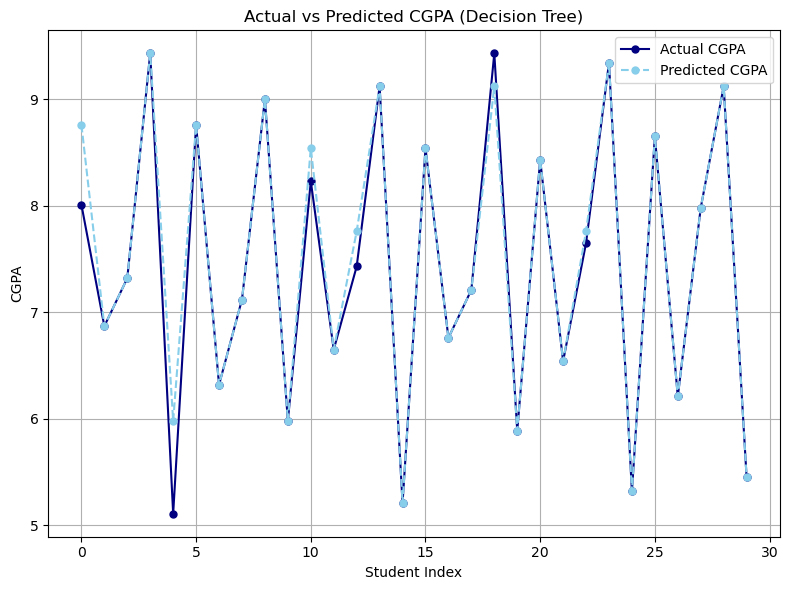

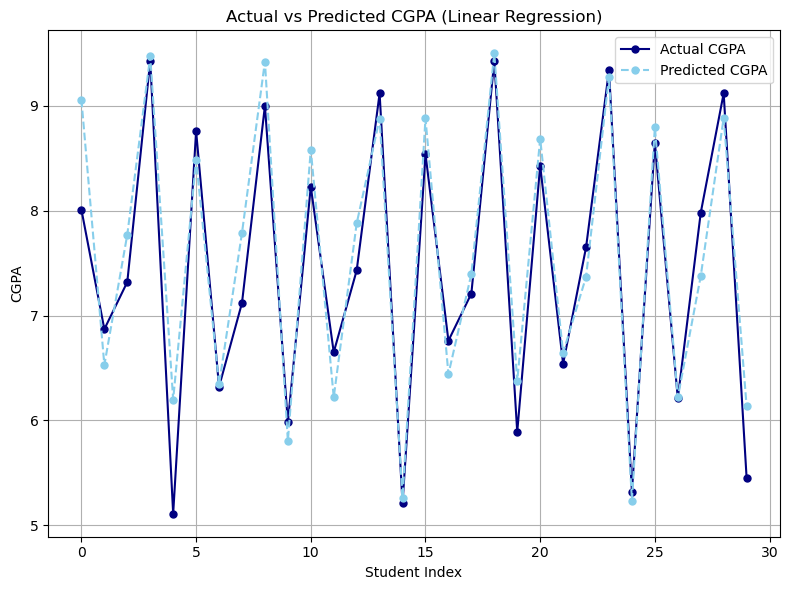

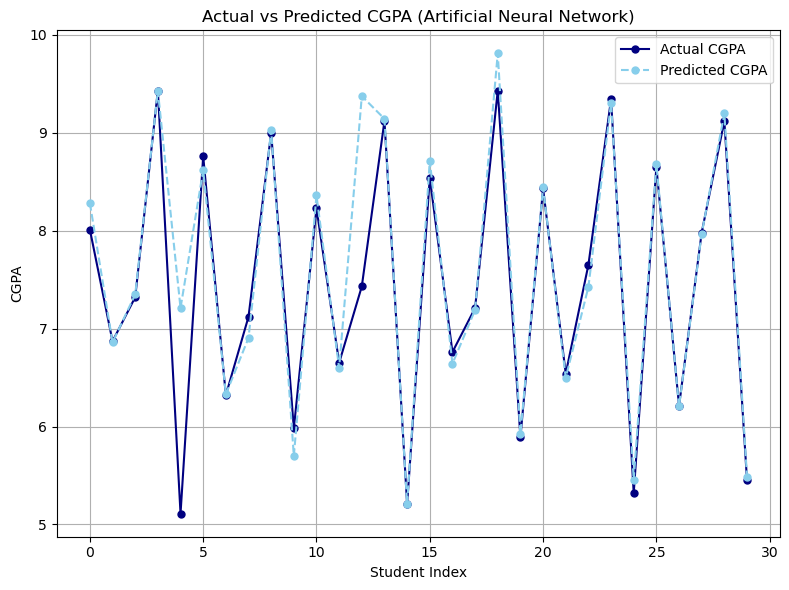

In [40]:
import matplotlib.pyplot as plt

def plot_model_comparison(actual, predicted, model_name):
    plt.figure(figsize=(8, 6))
    plt.plot(actual, color='navy', label='Actual CGPA', marker='o', markersize=5)
    plt.plot(predicted, color='skyblue', linestyle='--', label='Predicted CGPA', marker='o', markersize=5)
    plt.title(f'Actual vs Predicted CGPA ({model_name})')
    plt.xlabel('Student Index')
    plt.ylabel('CGPA')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

plot_model_comparison(actual_cgpa, predicted_cgpa_svr, 'SVR')
plot_model_comparison(actual_cgpa, predicted_cgpa_rf, 'Random Forest')
plot_model_comparison(actual_cgpa, predicted_cgpa_dt, 'Decision Tree')
plot_model_comparison(actual_cgpa, predicted_cgpa_lr, 'Linear Regression')
plot_model_comparison(actual_cgpa, predicted_cgpa_ann, 'Artificial Neural Network')


In [ ]:
!pip install xgboost


In [45]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.svm import SVR
import pandas as pd
from xgboost import XGBRegressor
import xgboost as xgb
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor

In [46]:
model = SVR(kernel='linear')
pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('model', model)])
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("SVR Model:")
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

SVR Model:
Mean Squared Error: 0.27693374283724836
R-squared: 0.8447510901418732


In [48]:
predicted_cgpa = pipeline.predict(X_test)

In [49]:
print(f"Predicted CGPA: {predicted_cgpa}")

Predicted CGPA: [8.67536306 8.76498401 8.17478907 8.92807529 5.49111162 5.85977419
 7.60185351 8.07990853 8.55801667 9.18381104 9.26250138 8.08238034
 8.60319617 9.06089798 8.76317966 6.2552869  6.26870922 6.97323654
 7.31407133 6.38637833]


In [50]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('model', rf_model)])
rf_pipeline.fit(X_train, y_train)
y_pred_rf = rf_pipeline.predict(X_test)
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)
print("Random Forest Model:")
print(f"Mean Squared Error: {mse_rf}")
print(f"R-squared: {r2_rf}")
predicted_cgpa_rf = rf_pipeline.predict(X_test)
print(f"Predicted CGPA: {predicted_cgpa_rf}")

Random Forest Model:
Mean Squared Error: 0.131755182499998
R-squared: 0.92613811433118
Predicted CGPA: [9.2295 9.2672 8.4533 8.6176 5.586  5.7164 7.4857 8.6185 8.3219 8.6293
 9.1687 8.5401 9.268  9.1927 8.414  5.9812 6.4641 7.4461 7.4775 6.3729]


In [51]:
dt_model = DecisionTreeRegressor(random_state=42)
dt_pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('model', dt_model)])
dt_pipeline.fit(X_train, y_train)
y_pred_dt = dt_pipeline.predict(X_test)
mse_dt = mean_squared_error(y_test, y_pred_dt)
r2_dt = r2_score(y_test, y_pred_dt)
print("Decision Tree Model:")
print(f"Mean Squared Error: {mse_dt}")
print(f"R-squared: {r2_dt}")
predicted_cgpa_rf = rf_pipeline.predict(X_test)
print(f"Predicted CGPA: {predicted_cgpa_rf}")

Decision Tree Model:
Mean Squared Error: 0.15927
R-squared: 0.9107133221839442
Predicted CGPA: [9.2295 9.2672 8.4533 8.6176 5.586  5.7164 7.4857 8.6185 8.3219 8.6293
 9.1687 8.5401 9.268  9.1927 8.414  5.9812 6.4641 7.4461 7.4775 6.3729]


In [52]:
linear_model = LinearRegression()
linear_pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('model', linear_model)])
linear_pipeline.fit(X_train, y_train)
y_pred_linear = linear_pipeline.predict(X_test)
mse_linear = mean_squared_error(y_test, y_pred_linear)
r2_linear = r2_score(y_test, y_pred_linear)
print("Multiple Linear Regression Model:")
print(f"Mean Squared Error: {mse_linear}")
print(f"R-squared: {r2_linear}")
predicted_cgpa_rf = rf_pipeline.predict(X_test)
print(f"Predicted CGPA: {predicted_cgpa_rf}")

Multiple Linear Regression Model:
Mean Squared Error: 0.28492104075424074
R-squared: 0.8402734151513831
Predicted CGPA: [9.2295 9.2672 8.4533 8.6176 5.586  5.7164 7.4857 8.6185 8.3219 8.6293
 9.1687 8.5401 9.268  9.1927 8.414  5.9812 6.4641 7.4461 7.4775 6.3729]


In [53]:
ann_model = MLPRegressor(hidden_layer_sizes=(100, 50), activation='relu', solver='adam', random_state=42, max_iter=500)
ann_pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('model', ann_model)])
ann_pipeline.fit(X_train, y_train)
y_pred_ann = ann_pipeline.predict(X_test)
mse_ann = mean_squared_error(y_test, y_pred_ann)
r2_ann = r2_score(y_test, y_pred_ann)
print("Artificial Neural Network (ANN) Model:")
print(f"Mean Squared Error: {mse_ann}")
print(f"R-squared: {r2_ann}")
predicted_cgpa_rf = rf_pipeline.predict(X_test)
print(f"Predicted CGPA: {predicted_cgpa_rf}")

Artificial Neural Network (ANN) Model:
Mean Squared Error: 1.1527435642452202
R-squared: 0.35377256717966443
Predicted CGPA: [9.2295 9.2672 8.4533 8.6176 5.586  5.7164 7.4857 8.6185 8.3219 8.6293
 9.1687 8.5401 9.268  9.1927 8.414  5.9812 6.4641 7.4461 7.4775 6.3729]


In [55]:
# Define the XGBoost model
xgb_model = XGBRegressor()
xgb_pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('model', xgb_model)])
xgb_pipeline.fit(X_train, y_train)
y_pred_xgb = xgb_pipeline.predict(X_test)
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)
print("XGBoost Model:")
print(f"Mean Squared Error: {mse_xgb}")
print(f"R-squared: {r2_xgb}")
predicted_cgpa_rf = rf_pipeline.predict(X_test)
print(f"Predicted CGPA: {predicted_cgpa_rf}")

XGBoost Model:
Mean Squared Error: 0.1789248772352276
R-squared: 0.8996948083946813
Predicted CGPA: [9.2295 9.2672 8.4533 8.6176 5.586  5.7164 7.4857 8.6185 8.3219 8.6293
 9.1687 8.5401 9.268  9.1927 8.414  5.9812 6.4641 7.4461 7.4775 6.3729]


In [59]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.svm import SVR
import pandas as pd
from xgboost import XGBRegressor
import xgboost as xgb
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor

def numerical_data(df):
    df['Sex'] = df['Sex'].map({'M': 0, 'F': 1})
    df['Mjob'] = df['Mjob'].map({'teacher': 0, 'health': 1, 'services': 2, 'at_home': 3, 'other': 4})
    df['Fjob'] = df['Fjob'].map({'teacher': 0, 'health': 1, 'services': 2, 'at_home': 3, 'other': 4})
    df['Reason'] = df['Reason'].map({'home': 0, 'reputation': 1, 'course': 2, 'other': 3})
    df['Activities'] = df['Activities'].map({'no': 0, 'yes': 1})
    df['Internet'] = df['Internet'].map({'no': 0, 'yes': 1})
    df['Test Preparation Course'] = df['Test Preparation Course'].map({'none': 0, 'completed': 1})

train_data = 'C:/Users/Admin/Downloads/Siva/MYDATA.csv'
df = pd.read_csv(train_data)
threshold = 3000
columns_to_drop = df.columns[df.isnull().sum() > threshold]
df.drop(columns=columns_to_drop, inplace=True)
numerical_data(df)
df.fillna(0, inplace=True)
#print(df)

numeric_df = df.select_dtypes(include=['float64', 'int64'])
corr = numeric_df.corr()

test_data = 'C:/Users/Admin/Downloads/Siva/test data.csv'
df1 = pd.read_csv(test_data)
numerical_data(df1)
#print(df1)

X= df.drop('CGPA', axis=1)
y = df['CGPA']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

categorical_columns = X.select_dtypes(include=['object']).columns
numeric_cols = X.select_dtypes(include=['number']).columns

X_numeric = X[numeric_cols]
X_categorical = X[categorical_columns]
numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(drop='first')
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_cols),
        ('cat', categorical_transformer, categorical_columns)
    ])
###############################################
model = SVR(kernel='linear')
pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('model', model)])
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("SVR Model:")
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")
###############################################
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('model', rf_model)])
rf_pipeline.fit(X_train, y_train)
y_pred_rf = rf_pipeline.predict(X_test)
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)
print("Random Forest Model:")
print(f"Mean Squared Error: {mse_rf}")
print(f"R-squared: {r2_rf}")
###############################################
dt_model = DecisionTreeRegressor(random_state=42)
dt_pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('model', dt_model)])
dt_pipeline.fit(X_train, y_train)
y_pred_dt = dt_pipeline.predict(X_test)
mse_dt = mean_squared_error(y_test, y_pred_dt)
r2_dt = r2_score(y_test, y_pred_dt)
print("Decision Tree Model:")
#print(f"Mean Squared Error: {mse_dt}")
print(f"R-squared: {r2_dt}")
###############################################
linear_model = LinearRegression()
linear_pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('model', linear_model)])
linear_pipeline.fit(X_train, y_train)
y_pred_linear = linear_pipeline.predict(X_test)
mse_linear = mean_squared_error(y_test, y_pred_linear)
r2_linear = r2_score(y_test, y_pred_linear)
print("Multiple Linear Regression Model:")
#print(f"Mean Squared Error: {mse_linear}")
print(f"R-squared: {r2_linear}")
###############################################
ann_model = MLPRegressor(hidden_layer_sizes=(100, 50), activation='relu', solver='adam', random_state=42, max_iter=500)
ann_pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('model', ann_model)])
ann_pipeline.fit(X_train, y_train)
y_pred_ann = ann_pipeline.predict(X_test)
mse_ann = mean_squared_error(y_test, y_pred_ann)
r2_ann = r2_score(y_test, y_pred_ann)
print("Artificial Neural Network (ANN) Model:")
#print(f"Mean Squared Error: {mse_ann}")
print(f"R-squared: {r2_ann}")
#####################################################
# Define the XGBoost model
xgb_model = XGBRegressor()
xgb_pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('model', xgb_model)])
xgb_pipeline.fit(X_train, y_train)
y_pred_xgb = xgb_pipeline.predict(X_test)
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)
print("XGBoost Model:")
#print(f"Mean Squared Error: {mse_xgb}")
print(f"R-squared: {r2_xgb}")


Exception ignored in: <function Booster.__del__ at 0x0000018F7B832AF0>
Traceback (most recent call last):
  File "C:\Users\Admin\anaconda3\lib\site-packages\xgboost\core.py", line 1753, in __del__
  File "C:\Users\Admin\anaconda3\lib\site-packages\xgboost\core.py", line 282, in _check_call
xgboost.core.XGBoostError: [21:27:26] C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\c_api\c_api.cc:898: DMatrix/Booster has not been initialized or has already been disposed.


SVR Model:
Mean Squared Error: 0.1182769372517135
R-squared: 0.8886503261814326
Random Forest Model:
Mean Squared Error: 0.1641307349724829
R-squared: 0.8454821013508875
Decision Tree Model:
Mean Squared Error: 0.23506665022402956
R-squared: 0.7787007726420497
Multiple Linear Regression Model:
Mean Squared Error: 0.11750288597335055
R-squared: 0.8893790426951274
Artificial Neural Network (ANN) Model:
Mean Squared Error: 0.16457904226334047
R-squared: 0.8450600505963838
XGBoost Model:
Mean Squared Error: 0.2331558263919198
R-squared: 0.7804996830245308
XGBoost Model after tuning:
R-squared: 0.8715368258902694
Random Forest Model after tuning:
R-squared: 0.8860499572830484
Multiple Linear Regression (Ridge) Model after tuning:
R-squared: 0.8894525167993884


In [ ]:
###########################################################
from xgboost import XGBRegressor
from sklearn.metrics import r2_score
# Instantiate XGBoost model with tuned hyperparameters
xgb_model = XGBRegressor(colsample_bytree=0.9,
                         gamma=0,
                         learning_rate=0.05,
                         max_depth=3,
                         min_child_weight=1,
                         n_estimators=100,
                         reg_alpha=0.1,
                         reg_lambda=0.1,
                         subsample=0.9)

# Fit the model to the entire training dataset
xgb_model.fit(X_train, y_train)
# Predict on the test dataset
y_pred_xgb = xgb_model.predict(X_test)
# Calculate R-squared score
r2_xgb = r2_score(y_test, y_pred_xgb)
print("XGBoost Model after tuning:")
print(f"R-squared: {r2_xgb}")
#######################################################3
rf_model_tuned = RandomForestRegressor(max_depth=None,
                                        min_samples_leaf=2,
                                        min_samples_split=5,
                                        n_estimators=100,
                                        random_state=42)

# Fit the model to the entire training dataset
rf_model_tuned.fit(X_train, y_train)

# Predict on the test dataset
y_pred_rf_tuned = rf_model_tuned.predict(X_test)

# Calculate R-squared score
r2_rf_tuned = r2_score(y_test, y_pred_rf_tuned)

print("Random Forest Model after tuning:")
print(f"R-squared: {r2_rf_tuned}")
#####################################################
ridge_model_tuned = Ridge(alpha=0.1)

# Fit the model to the entire training dataset
ridge_model_tuned.fit(X_train, y_train)

# Predict on the test dataset
y_pred_ridge_tuned = ridge_model_tuned.predict(X_test)

# Calculate R-squared score
r2_ridge_tuned = r2_score(y_test, y_pred_ridge_tuned)

print("Multiple Linear Regression (Ridge) Model after tuning:")
print(f"R-squared: {r2_ridge_tuned}")


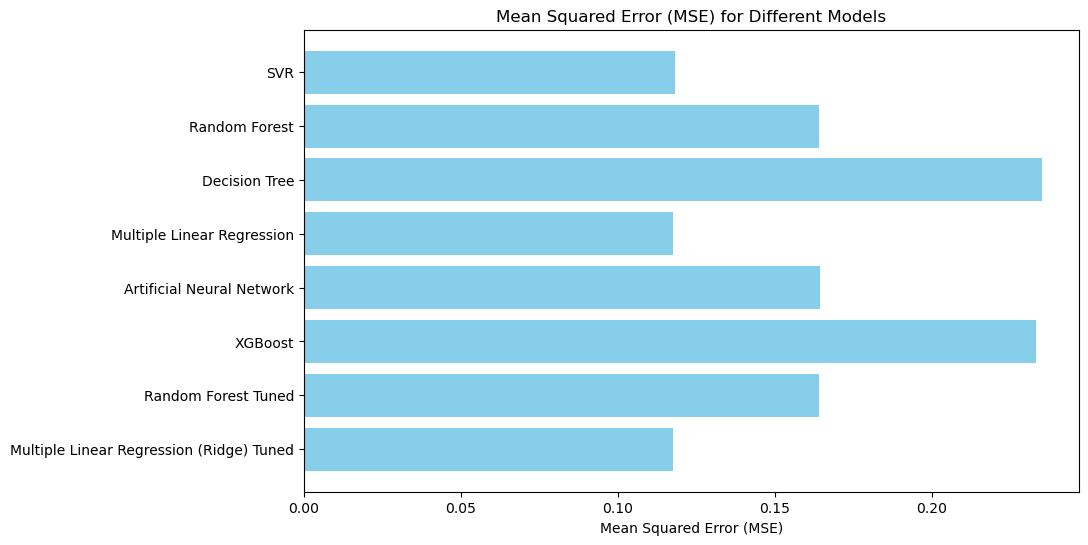

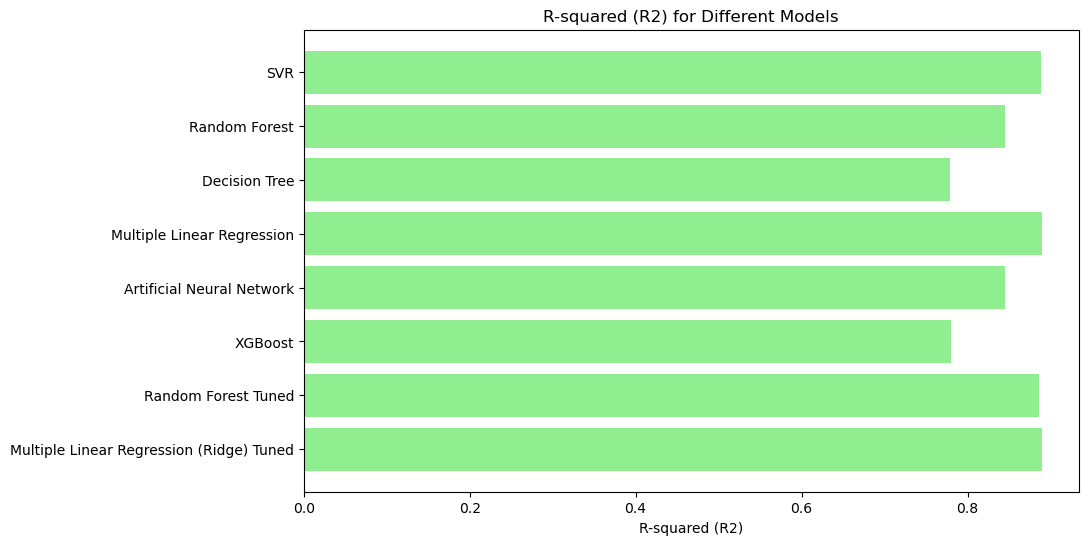

In [65]:
import matplotlib.pyplot as plt

# Model names for plotting
model_names = ['SVR', 'Random Forest', 'Decision Tree', 'Multiple Linear Regression', 
               'Artificial Neural Network', 'XGBoost', 'Random Forest Tuned', 
               'Multiple Linear Regression (Ridge) Tuned']

# Define MSE and R2 values for each model
mse_values = [0.1182769372517135, 0.1641307349724829, 0.23506665022402956, 
              0.11750288597335055, 0.16457904226334047, 0.2331558263919198, 
              0.1641307349724829, 0.11750288597335055]
r2_values = [0.8886503261814326, 0.8454821013508875, 0.7787007726420497, 
             0.8893790426951274, 0.8450600505963838, 0.7804996830245308, 
             0.8860499572830484, 0.8894525167993884]

# Plot MSE
plt.figure(figsize=(10, 6))
plt.barh(model_names, mse_values, color='skyblue')
plt.xlabel('Mean Squared Error (MSE)')
plt.title('Mean Squared Error (MSE) for Different Models')
plt.gca().invert_yaxis()  # Invert y-axis to display models from top to bottom
plt.show()

# Plot R2
plt.figure(figsize=(10, 6))
plt.barh(model_names, r2_values, color='lightgreen')
plt.xlabel('R-squared (R2)')
plt.title('R-squared (R2) for Different Models')
plt.gca().invert_yaxis()  # Invert y-axis to display models from top to bottom
plt.show()
